**Script for Post Processing simple sound wave**

athinput parameters:


<hydro>

gamma = 1.666666666666667 # gamma = C_p/C_v

iso_sound_speed = 2.0     # isothermal sound speed

<problem>

compute_error = true  # when 'true' outputs L1 error compared to initial data

wave_flag = 0         # Wave family number (0 - 4 for adiabatic hydro)

amp       = 1.0e-4    # Wave Amplitude

vflow     = 0.0       # background flow velocity

ang_2     = 0.0       # rotation of k around x3 axis

ang_3     = 0.0       # rotation of k around x2 axis

128


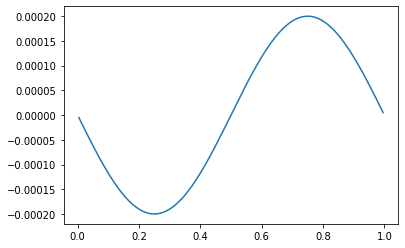

In [31]:
#import useful packages
import athena_read
from matplotlib import pylab as plt

#read from 0 time outputs
x,y,z,data = athena_read.vtk('./default/LinWave.block0.out2.00000.vtk')

#redefine x values to be average of adjacent outputs
x_avg = []

for i in range(len(x)-1):
    x_avg.append((x[i]+x[i+1])/2)
print(len(x_avg))

vel = data['vel'][0][0][:,0]
plt.plot(x_avg,vel)
plt.show()


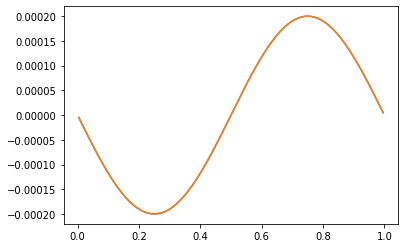

In [38]:
#Analytically determine expected v outputs, for (x,t=0)
#pgen gives k_par = 2pi/lambda where lambda is x1 = 1
import numpy as np
from matplotlib import pyplot as plt


cs = 2
k =np.pi*2

#expect amp from input file is DENSITY perturbation
p0 = 1
amp = .0001
v_pert = amp*cs/p0

#can determine lowercase omega frequency by dispersion relation
w = np.sqrt(k*k+cs*cs)
#set time = 0 for first vtk file
t=0

def func_vel(x):
    return v_pert*np.sin(-k*x+w*t)
plt.plot(x_avg,vel)

y_vel = []
for x in x_avg:
    y_vel.append(func_vel(x))

plt.plot(x_avg,y_vel)
plt.show()


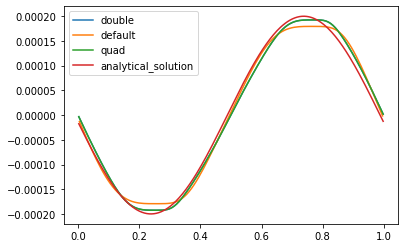

In [29]:
#for t!=0

import numpy as np
from matplotlib import pyplot as plt
import athena_read

def vel_plot(file_name,resolution):
    #read from 0 time outputs
    x,y,z,data = athena_read.vtk(file_name)

    #redefine x values to be average of adjacent outputs
    x_avg = []

    for i in range(len(x)-1):
        x_avg.append((x[i]+x[i+1])/2)


    vel = data['vel'][0][0][:,0]
    plt.plot(x_avg,vel,label = resolution)

vel_plot('./double_res/LinWave.block0.out2.04000.vtk','double')
vel_plot('./default/LinWave.block0.out2.04000.vtk','default')
vel_plot('./quad_res/LinWave.block0.out2.04000.vtk','quad')

#analytical solution
cs = 2
k =np.pi*2
w = np.sqrt(k*k+cs*cs)
#time step from athinput
dt = .01
#time is the vtk file number times dt
t = dt*4001

#expect amp from input file is DENSITY perturbation
p0 = 1
amp = .0001
#derived density and velocity perturbation relation
v_pert = amp*cs/p0

def func_vel(x):
    return v_pert*np.sin(-k*x+w*t)

y_vel = []
for x in x_avg:
    y_vel.append(func_vel(x))
    
plt.plot(x_avg,y_vel,label = 'analytical_solution')
plt.legend()